In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [4]:
df[['embark_town']].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
dtype: int64

In [5]:
df[['deck']].value_counts()

deck
C       59
B       47
D       33
E       32
A       15
F       13
G        4
dtype: int64

In [6]:
df[['deck']]=df[['deck']].fillna(value='B')

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck             0
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.shape

(891, 15)

In [9]:
mean=df[['age']].mean()

In [10]:
df[['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [11]:
df[['age']]=df[['age']].fillna(value=mean)

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [13]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,B,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,B,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,B,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,B,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,B,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [15]:
#replace the mode value with the missing value
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10856\914156102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='YlGnBu')


<Axes: >

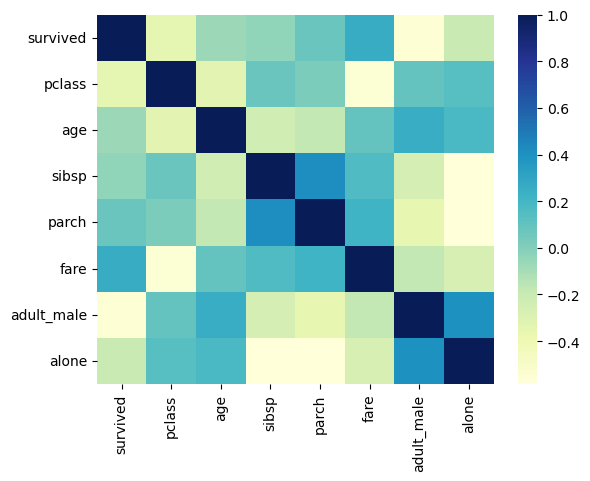

In [16]:
sns.heatmap(df.corr(),cmap='YlGnBu')

In [17]:
df.shape

(891, 15)

In [18]:
df=df.drop(columns=['alone','adult_male','parch','who','class','alive','embarked'])

In [19]:
df.head(1)

,survived,pclass,sex,age,sibsp,fare,deck,embark_town
0,0,3,male,22.0,1,7.25,B,Southampton


In [20]:
df['sex'].replace(['male','female'],[1,2],inplace=True)

In [21]:
df[["embark_town"]].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
dtype: int64

In [22]:
mode=df[['embark_town']].mode()

In [23]:
mode = df['embark_town'].mode().iloc[0]
df['embark_town'] = df['embark_town'].fillna(mode)

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
fare           0
deck           0
embark_town    0
dtype: int64

In [25]:
df.head(1)

,survived,pclass,sex,age,sibsp,fare,deck,embark_town
0,0,3,1,22.0,1,7.25,B,Southampton


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [27]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['survived']),df['survived'],test_size=0.2,random_state=100)

In [28]:
from sklearn.compose import ColumnTransformer

In [29]:
trans=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32),['deck','embark_town']),
#     ('tnf2',StandardScaler(),['pclass','sex','age','sibsp','fare'])
],remainder='passthrough')

In [30]:
x_train_transformed=trans.fit_transform(x_train)
x_train_transformed

array([[ 1.        ,  0.        ,  0.        , ..., 21.        ,
         0.        ,  7.775     ],
       [ 1.        ,  0.        ,  0.        , ...,  9.        ,
         5.        , 46.9       ],
       [ 1.        ,  0.        ,  0.        , ..., 29.        ,
         0.        ,  7.75      ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 39.        ,
         1.        , 83.1583    ],
       [ 1.        ,  0.        ,  0.        , ..., 29.69911765,
         8.        , 69.55      ],
       [ 1.        ,  0.        ,  0.        , ..., 30.        ,
         0.        , 93.5       ]])

In [31]:
x_test_transformed=trans.transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr_model = LogisticRegression()

In [34]:
lr_model.fit(x_train_transformed,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_lr_pred = lr_model.predict(x_test_transformed)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
lr_acc = accuracy_score(y_test,y_lr_pred)

In [38]:
lr_acc

0.7988826815642458

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtc=DecisionTreeClassifier()

In [41]:
dtc.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [42]:
y_pred=dtc.predict(x_test_transformed)

In [43]:
print(y_pred)

[1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1]


In [44]:
accuracy = accuracy_score(y_test, y_pred)

In [45]:
accuracy

0.776536312849162

In [46]:
from sklearn.linear_model import RidgeClassifier

In [47]:
R=RidgeClassifier()

In [48]:
R.fit(x_train_transformed,y_train)

RidgeClassifier()

In [49]:
y_pred1=R.predict(x_test_transformed)

In [50]:
y_pred1

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [51]:
accuracy_rigde=accuracy_score(y_test,y_pred1)

In [52]:
accuracy_rigde

0.8044692737430168

In [53]:
import pickle

In [54]:
pickle.dump(R,open("Ridge_model_classifier.pkl","wb"))